In [7]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [8]:
pwd=os.getcwd()
filepath=os.path.join(pwd,'The_Tax_Burden_on_Tobacco__1970-2019.csv')
#inflationpath=os.path.join(pwd,'US Inflation.csv')
data_import=pd.read_csv(filepath)
data=data_import.copy()
#data.columns
#data source is Table 7- Orzechowski and Walker, Tax Burden on Tobacco

In [9]:
#inf_data=pd.read_csv(inflationpath)
#inf_data.rename(columns={'Ave':'Average_Inflation','Cum':'Cumulative_Inflation'},inplace=True)

In [10]:
data=data[['LocationAbbr', 'LocationDesc', 'Year','MeasureDesc', 'SubMeasureDesc', 'Data_Value', 'Data_Value_Unit']]
#inf_data=inf_data[['Year','Average_Inflation','Cumulative_Inflation']]

In [11]:
tax_data=data[data['SubMeasureDesc']=='Federal and State Tax per pack']
tax_data=tax_data[tax_data['Year']>1999]
tax_data.sort_values(by=['Year','LocationAbbr'],inplace=True)
tax_data.reset_index(drop=True,inplace=True)

In [12]:
#merged_data=pd.merge(left=tax_data,right=inf_data,how='left',left_on='Year',right_on='Year')
#merged_data

In [13]:
#merged_data['Data_Value']=merged_data['Data_Value']#/merged_data['Cumulative_Inflation']
#merged_data

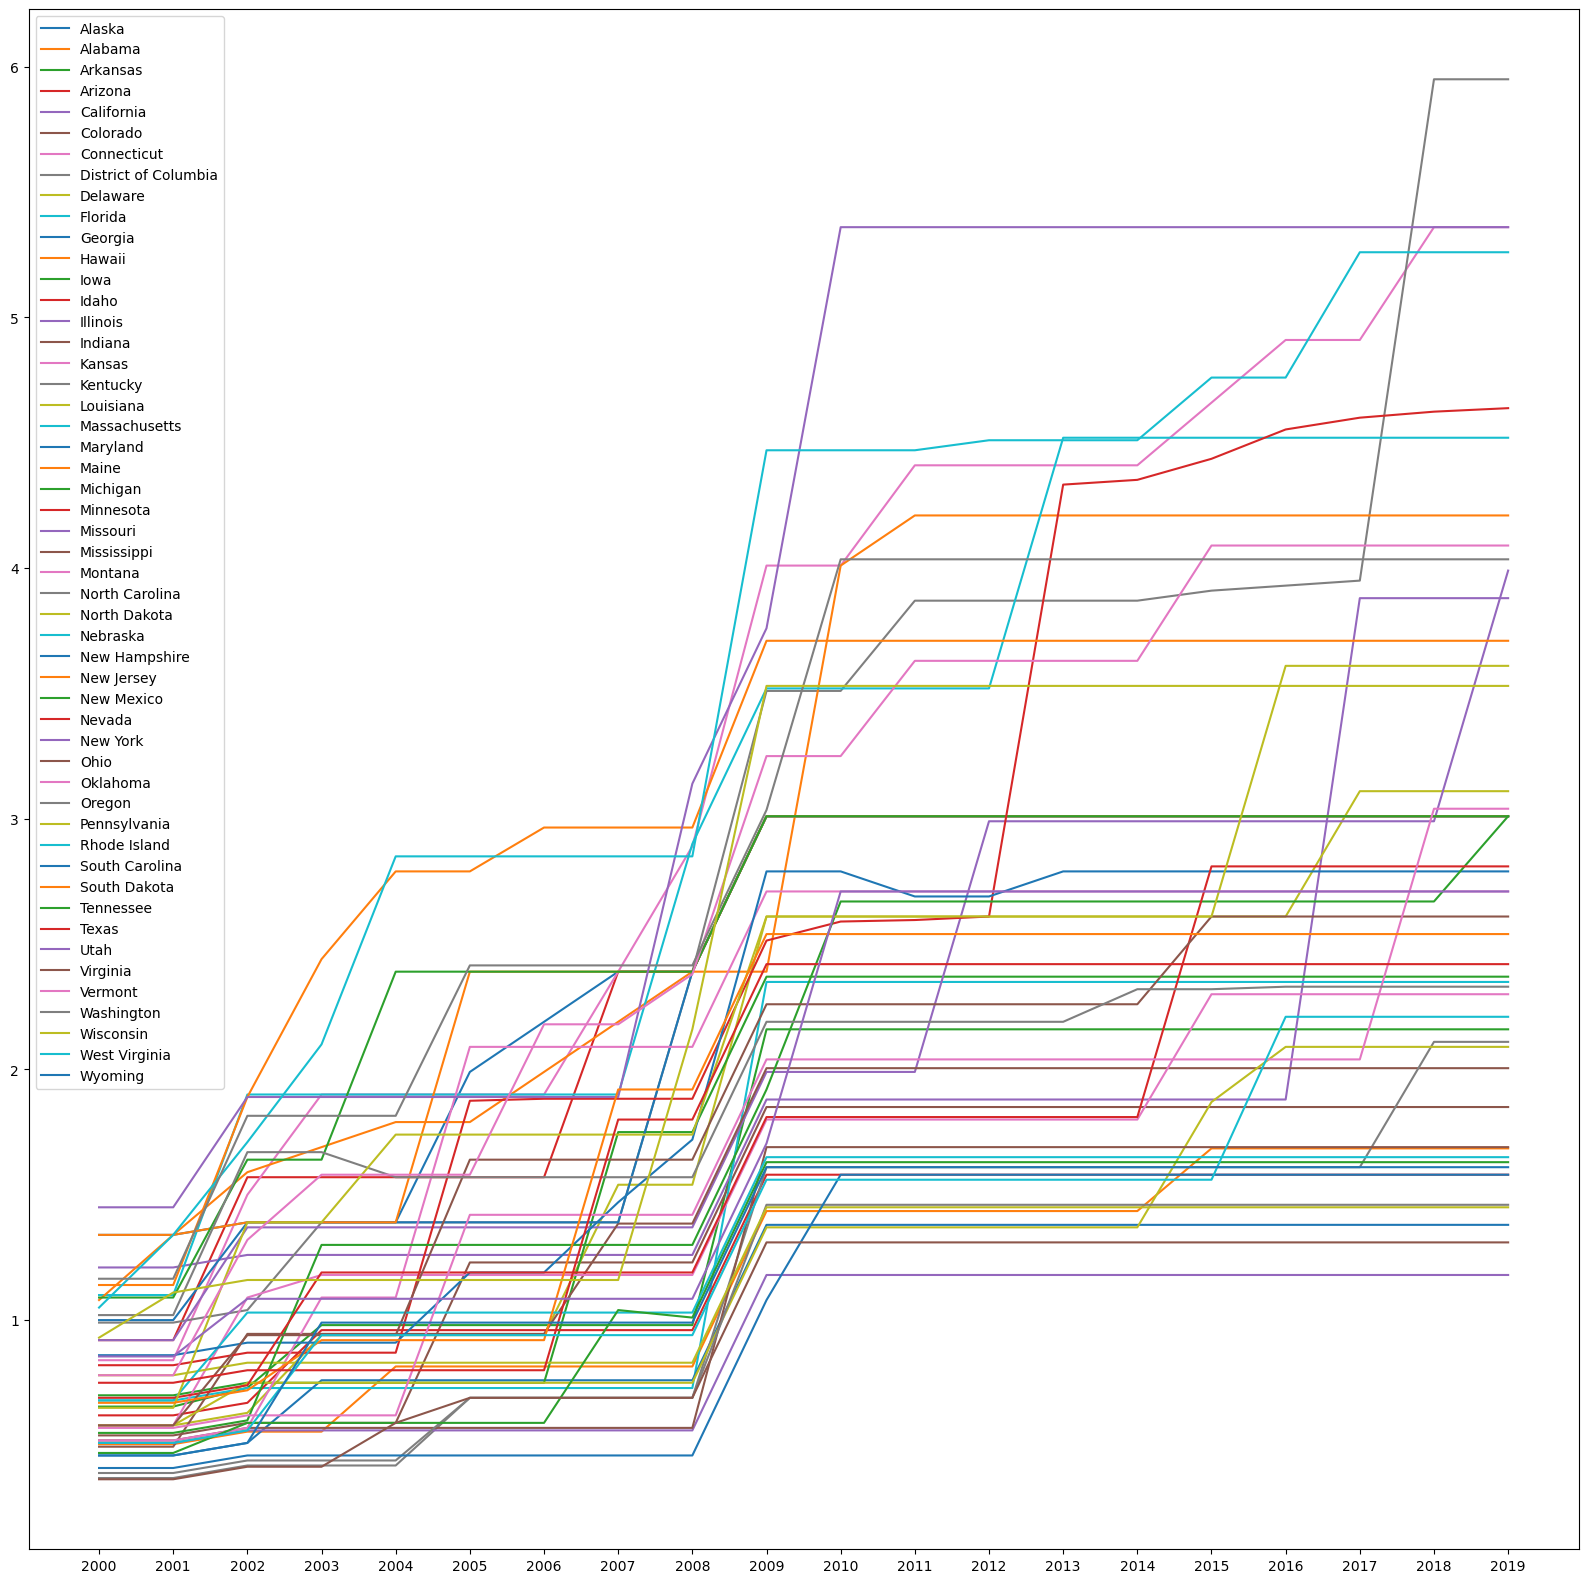

In [14]:
plt.figure(figsize=(20, 20))

for k in tax_data['LocationDesc'].unique():
    state_data = tax_data[tax_data['LocationDesc'] == k]
    plt.plot(state_data['Year'], state_data['Data_Value'], label=k)
    plt.xticks(range(int(state_data['Year'].min()), int(state_data['Year'].max()) + 1, 1))

plt.legend(loc='upper left')

plt.show()

In [15]:
tax_data.to_csv("Tax_hike_inflation_adjuster.csv")

In [16]:
tax_data.to_csv("Tax_hike.csv",index=False)

In [17]:
from pandasql import sqldf
def load_query(path):
    with open(path) as file:
        query=file.read()
    return query    
pysql=lambda q: sqldf(q,globals())

In [18]:
tax_hike_query=load_query('Tax_increase.sql')
tax_hike_data=pysql(tax_hike_query)

In [22]:
tax_hike_data.to_csv('Yearly_tax_increase_percentage.csv',index=False)